In [1]:
from mg import RandomMixtureGaussian,ScalingXORGaussian2D
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import TwoSlopeNorm

In [2]:
m = 3
rmg = ScalingXORGaussian2D(n_modes_per_class=m,scale=2, seed=3,sigma_noise=2)
x,y,d = rmg.generate(1000,as_df=False)

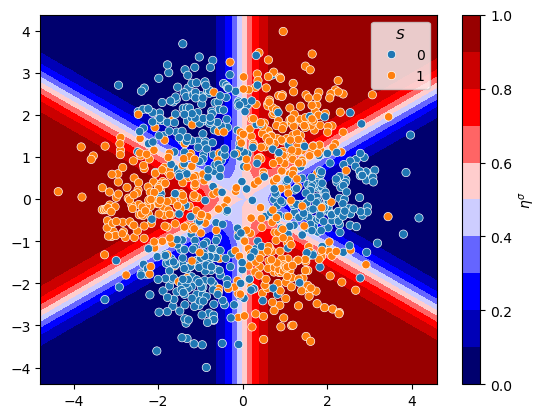

In [3]:
sns.scatterplot(x=x[:,0], y=x[:,1], hue=y,legend=False)
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

X,Y = np.meshgrid(np.linspace(*xlim,51),np.linspace(*ylim,51))
Z = (rmg._prob(list(zip(X.ravel(),Y.ravel())))).reshape(51,51)
plt.contourf(X,Y,Z, cmap='seismic',norm=TwoSlopeNorm(vcenter=0.5,vmin=0, vmax=1),levels=10)
plt.colorbar(label=r'$\eta^\sigma$')
sns.scatterplot(x=x[:,0], y=x[:,1], hue=y,legend=True)
plt.legend(title=r'$S$')
plt.savefig(f'xor_sample_{m}.pdf',bbox_inches='tight')